In [92]:
#importation des packages necessaires D
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
#lire dataset
df = pd.read_csv('./titanic.csv')

In [94]:
#size
df.shape

(891, 12)

In [95]:
#afficher les 10 premières  lignes
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [96]:
####### prétraitement ######
#le nombre des valeurs manquants de chaque colonne
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
#calculer la moyenne d'age
mn=df['Age'].mean()
#remplacer les valeurs manquants d'age par la moyenne
df['Age'].fillna(mn,inplace=True)

In [98]:
#afficher les valeurs manquants ( age : 0 valeur manquant )
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
#donner la frequence de chaque element de Embarked
df.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [100]:
#remplacer les valeurs manquants d'Embarked par mode ( valeur la plus frequente)
df['Embarked'].fillna('S', inplace=True)

In [101]:
#valeur manquant Embarked =0 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [102]:
#tempX contient les valeur non manquants de la colonne Cabin
tempX = df.loc[ -df.Cabin.isnull(), 'Cabin' ]  
#tempX contient les valeur non manquants de la colonne Survived
tempY = df.loc[ -df.Cabin.isnull(), 'Survived' ]
tempX.head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

In [103]:
#Extraire la première lettre de la colonne Cabin 
tempX = tempX.apply(lambda x : x[0])
tempX.head()

1     C
3     C
6     E
10    G
11    C
Name: Cabin, dtype: object

In [104]:
#affecter dataframe en dataframe_temporaire de deux colonne(la premiere lettre de Cabin , Survived)
temp_df = pd.DataFrame(  [ tempX.values, tempY.values ]  ).transpose()
temp_df.head()

,0,1
0,C,1
1,C,1
2,E,0
3,G,1
4,C,1


In [105]:
#renommer les colonnes de temp_df
temp_df.rename( columns = {0:'Cabin', 1:'Survived'} , inplace=True)
temp_df.head()

,Cabin,Survived
0,C,1
1,C,1
2,E,0
3,G,1
4,C,1


In [106]:
#grouper selon colonne Cabine (la taille)
temp_df.groupby('Cabin').size()

Cabin
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
dtype: int64

In [107]:
#remplacer les valeurs manquants de Cabin par mode 
df['Cabin'].fillna('C', inplace=True)

In [108]:
#valeur manquant Cabin =0 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [110]:
#Recherche des valeurs aberrantes ( convertir les données en écarts-types par rapport à la moyenne)
#stddev = La déviation de Stadard
def getdeviations(x, mean, stddev):
    return abs(x - mean) / stddev

In [111]:
from math import * 
df['Age'].std() # déviation de stadard d'age 

13.002015226002884

In [112]:
#les écarts-types par rapport à la moyenne
getdeviations(df['Age'],df['Age'].mean(),df['Age'].std())

0      5.921480e-01
1      6.384304e-01
2      2.845034e-01
3      4.076970e-01
4      4.076970e-01
5      4.371893e-15
6      1.869009e+00
7      2.130371e+00
8      2.075923e-01
9      1.207437e+00
10     1.976549e+00
11     2.176654e+00
12     7.459703e-01
13     7.153416e-01
14     1.207437e+00
15     1.945920e+00
16     2.130371e+00
17     4.371893e-15
18     1.000524e-01
19     4.371893e-15
20     4.076970e-01
21     3.307858e-01
22     1.130526e+00
23     1.306811e-01
24     1.668904e+00
25     6.384304e-01
26     4.371893e-15
27     8.228815e-01
28     4.371893e-15
29     4.371893e-15
           ...     
861    6.690592e-01
862    1.407542e+00
863    4.371893e-15
864    4.383257e-01
865    9.460751e-01
866    2.075923e-01
867    1.000524e-01
868    4.371893e-15
869    1.976549e+00
870    2.845034e-01
871    1.330631e+00
872    2.538747e-01
873    1.330631e+00
874    1.306811e-01
875    1.130526e+00
876    7.459703e-01
877    8.228815e-01
878    4.371893e-15
879    2.022831e+00


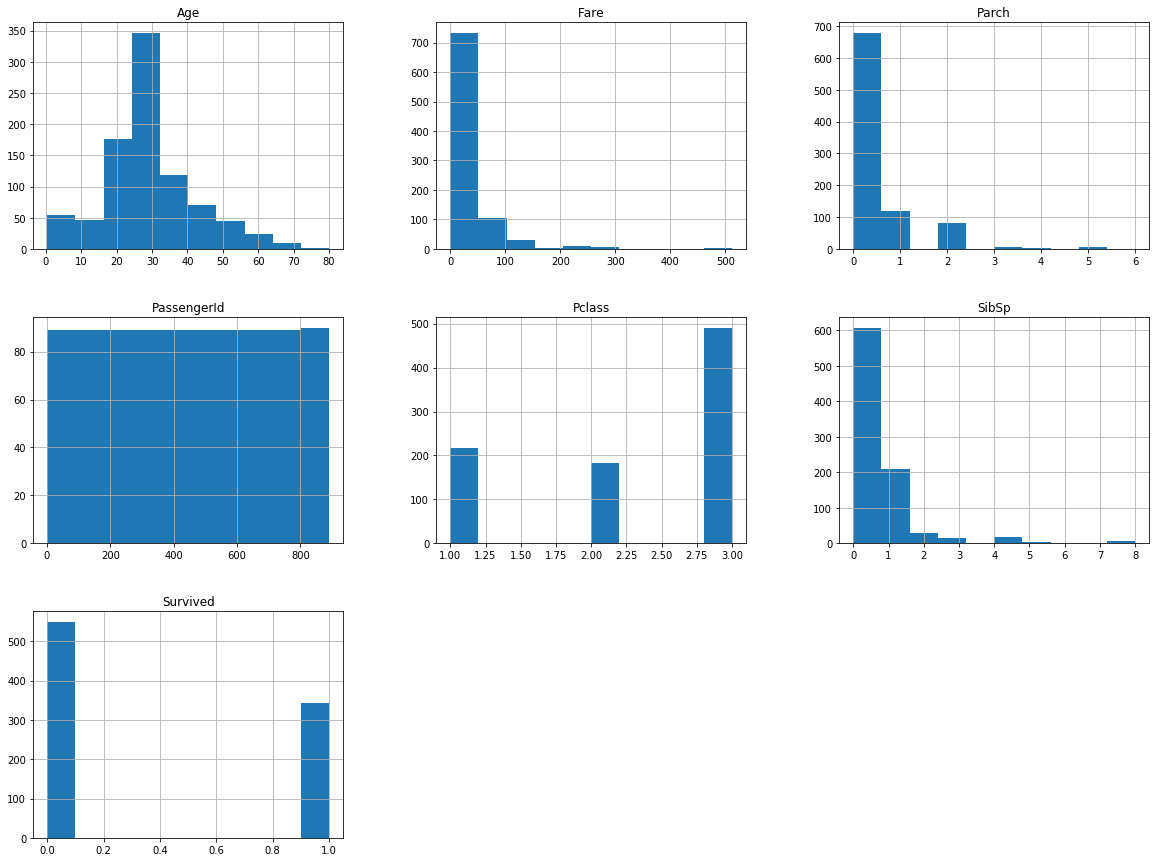

In [113]:
###  représentations graphiques
# variable quantitative
# afficher l'histogramme 
_=df.hist(figsize=(20,15))

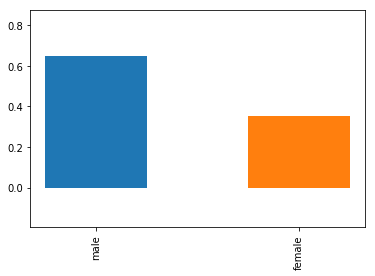

In [114]:
# variable qualitative ( Sex )
# Diagramme
df['Sex'].value_counts(normalize=True).plot(kind='bar')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

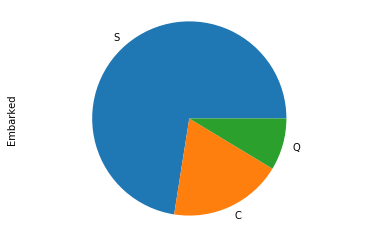

In [115]:
# variable qualitative ( Embarked )
# Diagramme en secteurs
df['Embarked'].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show() 

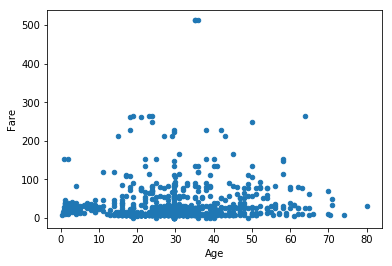

In [116]:
#Deux variables quantitatives (un nuage de points (Age,Fare))
df.plot.scatter(x='Age',y='Fare')

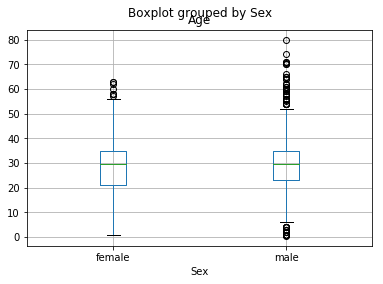

In [117]:
#une variable qualitative et une variable quantitative (Age,Sex)
df.boxplot(column='Age',by='Sex')

In [118]:
#les statistiques descriptives résumant la tendance centrale,
#la dispersion et la forme de la distribution d'un ensemble de données
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DFA5B5860>,
      dtype=object)

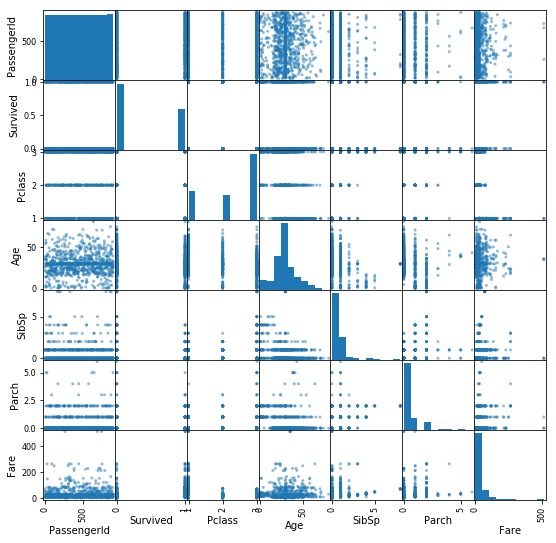

In [119]:
#une matrice de diagrammes de dispersion
import pandas.plotting as pp
import matplotlib
pp.scatter_matrix(df,figsize=(9,9))

In [120]:
#correlation entre les caractéristique
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [121]:
#correlation avec method='kendall'
h1=df.corr(method='kendall', min_periods=1) 
h1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.004090,-0.026824,0.028424,-0.048394,0.000798,-0.008921
Survived,-0.004090,1.000000,-0.323533,-0.032690,0.085915,0.133933,0.266229
Pclass,-0.026824,-0.323533,1.000000,-0.245526,-0.039552,-0.021019,-0.573531
Age,0.028424,-0.032690,-0.245526,1.000000,-0.116728,-0.173968,0.080726
SibSp,-0.048394,0.085915,-0.039552,-0.116728,1.000000,0.425241,0.358262
Parch,0.000798,0.133933,-0.021019,-0.173968,0.425241,1.000000,0.330360
Fare,-0.008921,0.266229,-0.573531,0.080726,0.358262,0.330360,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DF91C11D0>,
      dtype=object)

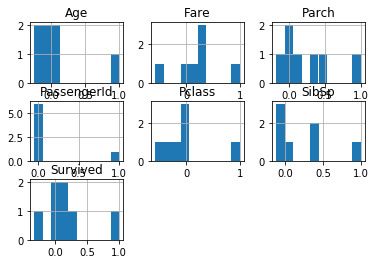

In [122]:
h1.hist()

In [123]:
#correlation avec method='spearman'
df.corr(method='spearman', min_periods=1) 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041560,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.039109,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032
Age,0.041560,-0.039109,-0.308875,1.000000,-0.147035,-0.217290,0.118847
SibSp,-0.061161,0.088879,-0.043019,-0.147035,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.217290,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.118847,0.447113,0.410074,1.000000


In [124]:
#correlation avec method='pearson'
df.corr(method='pearson', min_periods=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [125]:
#le tableau de contingence
X = "Sex"
Y = "Embarked"

c = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()

tx = df[X].value_counts()
ty = df[Y].value_counts()

cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(df)
cont

Embarked,C,Q,S,Total
Sex,,,,
female,73.0,36.0,205.0,314.0
male,95.0,41.0,441.0,577.0
total,168.0,77.0,646.0,891.0


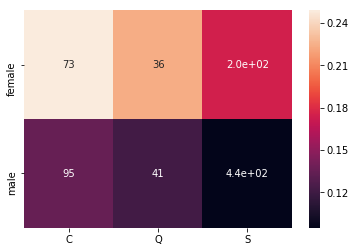

In [126]:
#ajoute une mesure statistique. (cette mesure est calculable pour chacune des cases du tableau de contingence.)
#appliquer sur cette mesure un seuil au delà duquel on dira que les 2 variables sont corrélées. (une contribution à la non indépendance)
import seaborn as sns
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(df)
indep = tx.dot(ty.T) / n

c = c.fillna(0) 
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
sns.heatmap(mesure/xi_n,annot=c)
plt.show()

In [127]:
###   Extraction de connaissances par « Règles d’association »

In [128]:
#pour faire cette Extraction il faut faire quelque modification pour bien Etablir cette connassaince
#afficher les premières  lignes de dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S


In [129]:
#remplacer la colonne de Cabine par la premiere lettre de sa contenu 
df.loc[-df.Cabin.isnull(),'Cabin'] = df.loc[-df.Cabin.isnull(),'Cabin'].apply( lambda x : x.split()[0][0] )
# remplacer les valeurs manquants de la colonne Cabine par N (NaN) 
df['Cabin'].fillna('N', inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S


In [130]:
#supprimer les colonnes inutiles ( ne contient aucun formation important)
data_pr= df.drop( ['PassengerId', 'Name', 'Ticket'], axis=1 ) 
data_pr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,C,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,C,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,C,S


In [131]:
#Convertir les colonnes catégorielles en
#variables indicatrices (pour chaque categorie ajoute une colonne pour specifier ou il est valide (= 1))
data_pr = pd.get_dummies( data_pr, columns=['Sex', 'Cabin', 'Embarked'])
data_pr.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0,1


In [132]:
# on choisit deux variables qui peut donner cette regle 
X= pd.DataFrame(  [ data_pr['Survived'], data_pr['Sex_female'] ]  ).transpose()
X.head()

,Survived,Sex_female
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


In [133]:
X.rename( columns = { 'Survived':0,'Sex_female':1} , inplace=True)
X.head()

,0,1
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


In [134]:
import numpy as np
[l,c]=np.shape(X)
#on ajoute deux colonne une colonne contient not survived et l'autre contient Sex_male
z = np.zeros((l,1), dtype='i')
Y=np.append(X,z,axis=1)
z1 = np.zeros((l,1), dtype='i')
Y=np.append(Y,z1,axis=1)
[l1,c1]=np.shape(Y)


In [135]:
for i in range(0,l1):
    for j in range(0,2):
        if Y[i,j]==1:
            Y[i,j+2]=0
        else:
            Y[i,j+2]=1

In [136]:
T = Y[:,1].copy()
Y[:,1] = Y[:,2]
Y[:,2] = T
Y
#donc apres cette transformation on a la table suivant ['Survived','not_survived','Sex_female','Sex_male'] 

array([[0, 1, 0, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 0],
       ...,
       [0, 1, 1, 0],
       [1, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [138]:
X1= pd.DataFrame(  [ data_pr['Cabin_A'], data_pr['Cabin_B'],data_pr['Cabin_C'],data_pr['Cabin_D'],data_pr['Cabin_E'],data_pr['Cabin_F'],data_pr['Cabin_G'],data_pr['Cabin_T'],data_pr['Embarked_C'],data_pr['Embarked_Q'],data_pr['Embarked_S']]  ).transpose()
X1.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,1


In [139]:
print(np.append(Y, X1, axis=1))

[[0 1 0 ... 0 0 1]
 [1 0 1 ... 1 0 0]
 [1 0 1 ... 0 0 1]
 ...
 [0 1 1 ... 0 0 1]
 [1 0 0 ... 1 0 0]
 [0 1 0 ... 0 1 0]]


In [141]:
X1.rename( columns = { 'Cabin_A':2,'Cabin_B':3,'Cabin_C':4,'Cabin_D':5,'Cabin_E':6,'Cabin_F':7,'Cabin_G':8,'Cabin_T':9,'Embarked_C':10,'Embarked_Q':11,'Embarked_S':12} , inplace=True)

In [142]:
X1.head()

,2,3,4,5,6,7,8,10,11,12,13
0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,1


In [143]:
Y=np.append(Y, X1, axis=1)

In [144]:
#donc apres cette transformation on a la table suivant ['Survived','not_survived','Sex_female','Sex_male',
#  ,'Cabin_A',......'Cabin_T','Embarked_C',..,'Embarked_S']
Y

array([[0, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 1, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int64)

In [145]:
#nombre de survived
nbr_sur=0
for i in range(0,l):
    if Y[i,0]==1:
        nbr_sur+=1

print(nbr_sur)

342


In [146]:
[l1,c1]=np.shape(Y)

In [147]:
#algo pour calculer regles_valides et regles_non_valides et support et confiance
from collections import defaultdict
valides= defaultdict(float) 
invalides = defaultdict(float)   
confiance= defaultdict(float) 
support = defaultdict(float) 
nombre_occurances = defaultdict(int) 
for i in range(0,l1):
    for j in range(0,c1):
        if Y[i,j]==1:
            nombre_occurances[j]+=1
        for k in range(0,c1):
            if j==k:
                continue
            elif Y[i,j]==1:
                if Y[i,k]==1:
                    valides[j,k]+=1
                else:
                    invalides[j,k]+=1
            if nombre_occurances[j]!=0:
                confiance[j,k] = valides[j,k]/nombre_occurances[j]
                support[j,k] = valides[j,k]

In [148]:
#regles_valides
print(valides)

defaultdict(<class 'float'>, {(1, 0): 0.0, (1, 2): 81.0, (1, 3): 468.0, (1, 4): 8.0, (1, 5): 12.0, (1, 6): 505.0, (1, 7): 8.0, (1, 8): 8.0, (1, 9): 5.0, (1, 10): 2.0, (1, 11): 1.0, (1, 12): 75.0, (1, 13): 47.0, (1, 14): 427.0, (3, 0): 109.0, (3, 1): 468.0, (3, 2): 0.0, (3, 4): 14.0, (3, 5): 20.0, (3, 6): 502.0, (3, 7): 15.0, (3, 8): 17.0, (3, 9): 8.0, (3, 10): 0.0, (3, 11): 1.0, (3, 12): 95.0, (3, 13): 41.0, (3, 14): 441.0, (6, 0): 241.0, (6, 1): 505.0, (6, 2): 244.0, (6, 3): 502.0, (6, 4): 0.0, (6, 5): 0.0, (6, 7): 0.0, (6, 8): 0.0, (6, 9): 0.0, (6, 10): 0.0, (6, 11): 0.0, (6, 12): 120.0, (6, 13): 75.0, (6, 14): 551.0, (14, 0): 219.0, (14, 1): 427.0, (14, 2): 205.0, (14, 3): 441.0, (14, 4): 8.0, (14, 5): 25.0, (14, 6): 551.0, (14, 7): 20.0, (14, 8): 26.0, (14, 9): 11.0, (14, 10): 4.0, (14, 11): 1.0, (14, 12): 0.0, (14, 13): 0.0, (0, 1): 0.0, (0, 2): 233.0, (0, 3): 109.0, (0, 4): 7.0, (0, 5): 35.0, (0, 6): 241.0, (0, 7): 25.0, (0, 8): 24.0, (0, 9): 8.0, (0, 10): 2.0, (0, 11): 0.0, (0, 

In [149]:
#support
print(support)

defaultdict(<class 'float'>, {(1, 0): 0.0, (1, 2): 81.0, (1, 3): 468.0, (1, 4): 8.0, (1, 5): 12.0, (1, 6): 505.0, (1, 7): 8.0, (1, 8): 8.0, (1, 9): 5.0, (1, 10): 2.0, (1, 11): 1.0, (1, 12): 75.0, (1, 13): 47.0, (1, 14): 427.0, (3, 0): 109.0, (3, 1): 468.0, (3, 2): 0.0, (3, 4): 14.0, (3, 5): 20.0, (3, 6): 502.0, (3, 7): 15.0, (3, 8): 17.0, (3, 9): 8.0, (3, 10): 0.0, (3, 11): 1.0, (3, 12): 95.0, (3, 13): 41.0, (3, 14): 441.0, (6, 0): 241.0, (6, 1): 505.0, (6, 2): 244.0, (6, 3): 502.0, (6, 4): 0.0, (6, 5): 0.0, (6, 7): 0.0, (6, 8): 0.0, (6, 9): 0.0, (6, 10): 0.0, (6, 11): 0.0, (6, 12): 120.0, (6, 13): 75.0, (6, 14): 551.0, (14, 0): 219.0, (14, 1): 427.0, (14, 2): 205.0, (14, 3): 441.0, (14, 4): 8.0, (14, 5): 25.0, (14, 6): 551.0, (14, 7): 20.0, (14, 8): 26.0, (14, 9): 11.0, (14, 10): 4.0, (14, 11): 1.0, (14, 12): 0.0, (14, 13): 0.0, (0, 1): 0.0, (0, 2): 233.0, (0, 3): 109.0, (0, 4): 7.0, (0, 5): 35.0, (0, 6): 241.0, (0, 7): 25.0, (0, 8): 24.0, (0, 9): 8.0, (0, 10): 2.0, (0, 11): 0.0, (0, 

In [154]:
#confiance
print(confiance)

defaultdict(<class 'float'>, {(1, 0): 0.0, (1, 2): 0.14754098360655737, (1, 3): 0.8524590163934426, (1, 4): 0.014571948998178506, (1, 5): 0.02185792349726776, (1, 6): 0.9198542805100182, (1, 7): 0.014571948998178506, (1, 8): 0.014571948998178506, (1, 9): 0.009107468123861567, (1, 10): 0.0036429872495446266, (1, 11): 0.0018214936247723133, (1, 12): 0.1366120218579235, (1, 13): 0.08561020036429873, (1, 14): 0.7777777777777778, (3, 0): 0.18890814558058924, (3, 1): 0.8110918544194108, (3, 2): 0.0, (3, 4): 0.024263431542461005, (3, 5): 0.03466204506065858, (3, 6): 0.8700173310225303, (3, 7): 0.025996533795493933, (3, 8): 0.029462738301559793, (3, 9): 0.01386481802426343, (3, 10): 0.0, (3, 11): 0.0017331022530329288, (3, 12): 0.16464471403812825, (3, 13): 0.07105719237435008, (3, 14): 0.7642980935875217, (6, 0): 0.3230563002680965, (6, 1): 0.6769436997319035, (6, 2): 0.32707774798927614, (6, 3): 0.6729222520107239, (6, 4): 0.0, (6, 5): 0.0, (6, 7): 0.0, (6, 8): 0.0, (6, 9): 0.0, (6, 10): 0.0

In [155]:
col=['survived','not_survived','Sex_female','Sex_male','Cabin_A','Cabin_B','Cabin_C','Cabin_D','Cabin_E','Cabin_F','Cabin_G','Cabin_T','Embarked_C','Embarked_Q','Embarked_S']

In [156]:
#definir la regle
def regle(premise,conclusion):
    print("Si une personne ",col[premise],", elle est de  ",col[conclusion]," avec un support de ",support[premise,conclusion]," et une confiance de ",confiance[premise,conclusion],". ")

In [161]:
#test la fonction
regle(1,3)
regle(1,2)
regle(0,10)
regle(1,12)
regle(6,14)

Si une personne  not_survived , elle est de   Sex_male  avec un support de  468.0  et une confiance de  0.8524590163934426 . 
Si une personne  not_survived , elle est de   Sex_female  avec un support de  81.0  et une confiance de  0.14754098360655737 . 
Si une personne  survived , elle est de   Cabin_G  avec un support de  2.0  et une confiance de  0.005847953216374269 . 
Si une personne  not_survived , elle est de   Embarked_C  avec un support de  75.0  et une confiance de  0.1366120218579235 . 
Si une personne  Cabin_C , elle est de   Embarked_S  avec un support de  551.0  et une confiance de  0.7386058981233244 . 


In [159]:
from operator import itemgetter
#trier les regles selon support
tab=sorted(support.items(), key=itemgetter(1), reverse=True)

In [160]:
for i in range(10):
    print(tab[i])

((6, 14), 551.0)
((14, 6), 551.0)
((1, 6), 505.0)
((6, 1), 505.0)
((3, 6), 502.0)
((6, 3), 502.0)
((1, 3), 468.0)
((3, 1), 468.0)
((3, 14), 441.0)
((14, 3), 441.0)


In [162]:
###### . Extraction de connaissances par « Classification Ascendante Hiérarchique ou d’autre type de classification»

In [163]:
import sklearn
import sklearn.preprocessing
#normaliser le dataset data_pr(apres Convertir les colonnes catégorielles de le dataset en variables indicatrices)
scale=sklearn.preprocessing.scale(data_pr)

In [164]:
print(scale)

[[-0.78927234  0.82737724 -0.5924806  ... -0.48204268 -0.30756234
   0.61583843]
 [ 1.2669898  -1.56610693  0.63878901 ...  2.0745051  -0.30756234
  -1.62380254]
 [ 1.2669898   0.82737724 -0.2846632  ... -0.48204268 -0.30756234
   0.61583843]
 ...
 [-0.78927234  0.82737724  0.         ... -0.48204268 -0.30756234
   0.61583843]
 [ 1.2669898  -1.56610693 -0.2846632  ...  2.0745051  -0.30756234
  -1.62380254]
 [-0.78927234  0.82737724  0.17706291 ... -0.48204268  3.25137334
  -1.62380254]]


In [165]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
#générer la matrice  des liens
z=scipy.cluster.hierarchy.linkage(scale,method='ward',metric='euclidean')
print(z)

[[ 451.          490.            0.            2.        ]
 [   4.          614.            0.            2.        ]
 [ 126.          196.            0.            2.        ]
 ...
 [1771.         1776.           48.79479399  388.        ]
 [1766.         1778.           52.69981493  751.        ]
 [1777.         1779.           65.37294046  891.        ]]


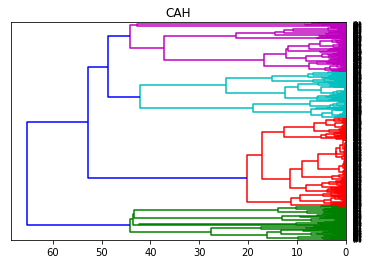

In [177]:
from scipy.cluster.hierarchy import dendrogram
plt.title("CAH")
dendrogram(z,orientation='left',color_threshold=45)
plt.show()

In [178]:
from scipy.cluster.hierarchy import fcluster
#afficher la classe obtenue pour chaque observation
groupes=fcluster(z,t=45,criterion='distance')
print(groupes)

[2 3 4 4 2 3 1 4 4 3 4 4 2 4 4 4 4 2 4 3 2 1 3 1 4 4 3 1 3 2 3 1 3 2 3 2 3
 2 4 3 4 4 3 3 3 2 3 3 3 4 4 2 1 4 1 2 4 3 4 4 3 1 2 4 3 3 4 2 4 2 2 4 2 3
 2 4 2 2 2 4 2 2 3 2 4 4 2 2 1 2 2 2 1 2 2 2 1 1 4 2 4 2 1 2 2 2 4 2 2 3 2
 3 2 4 3 2 3 2 1 4 2 2 3 1 1 3 3 2 4 2 3 2 4 4 2 3 1 2 2 1 3 4 4 3 2 2 2 4
 4 2 2 4 2 2 2 3 3 2 2 4 2 4 2 2 4 2 1 4 2 2 1 4 4 2 1 2 2 3 2 2 4 3 4 4 4
 1 3 2 3 2 4 2 4 4 1 1 3 2 3 4 2 4 2 3 2 4 2 3 3 1 2 4 2 2 3 1 4 2 1 2 2 2
 2 2 2 2 2 2 2 4 4 2 2 4 2 4 2 4 2 2 3 3 2 2 3 3 4 4 1 2 2 4 2 2 4 3 3 1 1
 4 3 4 1 1 3 2 4 2 4 4 2 2 4 3 3 1 4 2 4 4 3 2 2 2 1 3 2 2 2 3 4 1 1 4 2 3
 3 1 2 1 3 3 2 1 2 1 3 3 3 1 3 1 4 2 2 4 4 2 4 1 2 2 3 4 4 3 2 1 4 1 3 2 1
 2 4 2 2 1 2 1 4 1 2 2 2 4 4 4 2 2 2 2 3 2 3 2 1 4 3 3 4 3 3 2 3 2 1 3 3 1
 1 2 2 3 4 3 4 1 3 2 3 3 2 4 2 2 4 4 3 3 1 2 2 1 4 2 4 2 2 4 2 2 4 2 4 2 2
 2 2 4 2 3 3 2 2 4 4 4 2 4 3 3 2 4 2 2 4 4 3 1 2 4 4 2 1 1 4 4 1 2 4 2 2 4
 2 1 4 2 3 2 2 2 3 3 2 3 1 1 4 3 1 2 1 2 2 2 2 2 3 3 2 2 4 1 4 1 2 2 2 4 4
 2 2 4 1 4 4 1 2 2 2 2 2 

In [179]:
#trier les observations par indice de la classe.
nb=np.argsort(groupes)
print(pd.DataFrame(data_pr,groupes[nb]))

    Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
1          1       1  38.0      1      0  71.2833           1         0   
1          1       1  38.0      1      0  71.2833           1         0   
1          1       1  38.0      1      0  71.2833           1         0   
1          1       1  38.0      1      0  71.2833           1         0   
1          1       1  38.0      1      0  71.2833           1         0   
1          1       1  38.0      1      0  71.2833           1         0   
1          1       1  38.0      1      0  71.2833           1         0   
1          1       1  38.0      1      0  71.2833           1         0   
1          1       1  38.0      1      0  71.2833           1         0   
1          1       1  38.0      1      0  71.2833           1         0   
1          1       1  38.0      1      0  71.2833           1         0   
1          1       1  38.0      1      0  71.2833           1         0   
1          1       1  38.

In [180]:
### K-means

In [181]:
from sklearn import cluster
#Initialiser une matrice k-means
kmeans=cluster.KMeans(n_clusters=4)
kmeans.fit(scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [182]:
#trier les observations par indice de la classe.
idk=np.argsort(kmeans.labels_)
print(pd.DataFrame(data_pr,groupes[idk]))

    Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
2          1       3  26.0      0      0   7.9250           1         0   
2          1       3  26.0      0      0   7.9250           1         0   
2          1       3  26.0      0      0   7.9250           1         0   
2          1       3  26.0      0      0   7.9250           1         0   
2          1       3  26.0      0      0   7.9250           1         0   
2          1       3  26.0      0      0   7.9250           1         0   
2          1       3  26.0      0      0   7.9250           1         0   
2          1       3  26.0      0      0   7.9250           1         0   
2          1       3  26.0      0      0   7.9250           1         0   
3          1       1  35.0      1      0  53.1000           1         0   
1          1       1  38.0      1      0  71.2833           1         0   
2          1       3  26.0      0      0   7.9250           1         0   
2          1       3  26.

In [183]:
i=np.argsort(kmeans.labels_)
print(pd.DataFrame(data_pr,kmeans.labels_[i]))

    Survived  Pclass   Age  SibSp  Parch   Fare  Sex_female  Sex_male  \
0          0       3  22.0      1      0   7.25           0         1   
0          0       3  22.0      1      0   7.25           0         1   
0          0       3  22.0      1      0   7.25           0         1   
0          0       3  22.0      1      0   7.25           0         1   
0          0       3  22.0      1      0   7.25           0         1   
0          0       3  22.0      1      0   7.25           0         1   
0          0       3  22.0      1      0   7.25           0         1   
0          0       3  22.0      1      0   7.25           0         1   
0          0       3  22.0      1      0   7.25           0         1   
0          0       3  22.0      1      0   7.25           0         1   
0          0       3  22.0      1      0   7.25           0         1   
0          0       3  22.0      1      0   7.25           0         1   
0          0       3  22.0      1      0   7.25    

In [184]:
#la correspondance entre les classes CAH et K-means
pd.crosstab(kmeans.labels_,groupes)

col_0,1,2,3,4
row_0,,,,
0,8,363,71,25
1,127,0,0,0
2,4,0,46,170
3,1,0,70,6
